# NN - Input Preprocessing and Regularization

This colab notebook is an introduction to input preprocessing for NN and regularization techniques for NN.

Input preproccesing refers to making some transformations to the data before feeding it to NN. Depending on type of data (textual, image, other) different input transformations may be applied. This notebook does not cover the specific transformations for different data types. It introduces to transformations which are quite general to all data types and helps NN to perform better.

In [0]:
import keras
from keras.layers import Dense,Input,Dropout,BatchNormalization
from keras import Model
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import gc

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

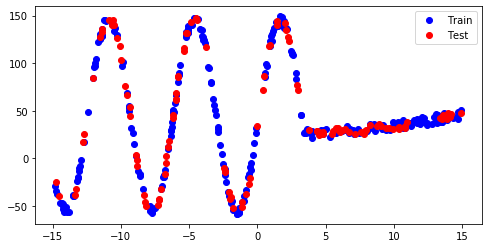

In [37]:
# Generate random data
X = 30*np.random.random(400)-15
Y = np.array([1/100*(x-0.1)**2 +np.random.random(1)+2
              if x>3.5 else 10*np.sin(x-0.1) +np.random.random(1)+4
              for x in X])*10
# Plot data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)
plt.figure(figsize = (8,4))
plt.plot(X_train,Y_train,'bo',label = 'Train')
plt.plot(X_test,Y_test,'ro',label = 'Test')
plt.legend()
plt.show()

In [0]:
# NN architecture
def create_model(hn = 6):
    input_layer = Input(shape = (1,), name = 'input_layer') # input layer
    h1 = Dense(hn,activation='sigmoid',
               name = 'hidden_layer1')(input_layer) # hidden layer 1
    h2 = Dense(hn,activation='sigmoid',
               name = 'hidden_layer2')(h1) # hidden layer 2
    h3 = Dense(hn,activation='sigmoid',
               name = 'hidden_layer3')(h2) # hidden layer 3
    output = Dense(1, name = 'output_layer')(h3)

    model = Model(input_layer,output)
    model.compile(optimizer='adam',loss = 'mse')
    return model

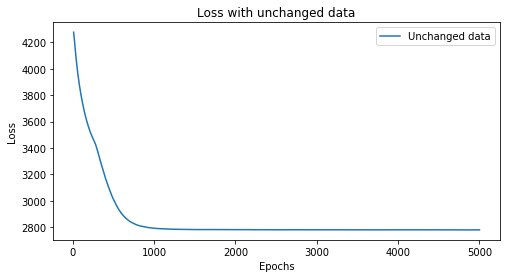

In [34]:
# Train model and save the Loss each 10th epoch
model = create_model()
epochs = []
non_normalized_loss = []
for i in tqdm(range(500)):
    model.fit(X,Y,epochs=10,verbose = 0)    
    epochs.append(10*(i+1))
    non_normalized_loss.append(model.evaluate(X_test,Y_test,verbose=0))
# Plot Epochs vs Loss
plt.figure(figsize = (8,4))
plt.plot(epochs,non_normalized_loss,label = 'Unchanged data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss with unchanged data')
plt.legend()
plt.show()

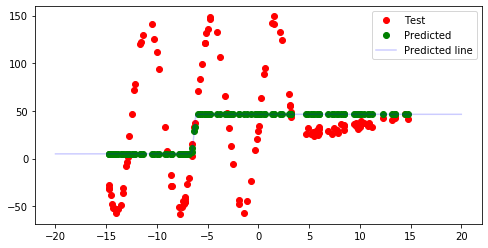

In [35]:
plt.figure(figsize = (8,4))
#plt.plot(X_train,Y_train,'bo',label = 'Train')
plt.plot(X_test,Y_test,'ro',label = 'Test')
plt.plot(X_test,model.predict(X_test),'go',label = 'Predicted')
plt.plot(np.linspace(-20,20,1000).reshape(-1,1),
         model.predict(np.linspace(-20,20,1000).reshape(-1,1)),
         'b',label = 'Predicted line',alpha = 0.2)
plt.legend()
plt.show()

One of key transformations is to bring the input and output data on the same scale and close to 0. The main reason is activation function. As activation function usually is sigmoid it transforms the data to 0-1 scale. Furthermore when it receives big values it is quite saturated and gradient will update rather slowly. The sweetspot of sigmoid function input is around 0, as gradient has most momentum at that region.

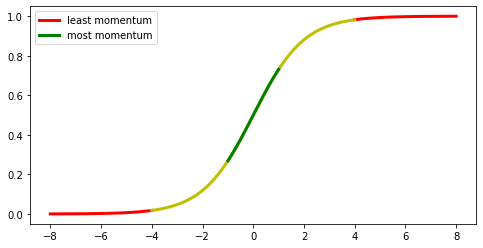

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
plt.figure(figsize =(8,4))
plt.plot(np.linspace(-8,-4,1000),sigmoid(np.linspace(-8,-4,1000)),'r',lw = 3)
plt.plot(np.linspace(4,8,1000),sigmoid(np.linspace(4,8,1000)),'r',
         label = 'least momentum',lw = 3)
plt.plot(np.linspace(-4,1,1000),sigmoid(np.linspace(-4,1,1000)),'y',lw = 3)
plt.plot(np.linspace(1,4,1000),sigmoid(np.linspace(1,4,1000)),'y',lw = 3)
plt.plot(np.linspace(-1,1,1000),sigmoid(np.linspace(-1,1,1000)),'g',
         label = 'most momentum',lw = 3)
plt.legend()
plt.show()

In [43]:
# MinMax scale data
scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1, 1))
x_train = scaler.transform(X_train.reshape(-1, 1))
x_test = scaler.transform(X_test.reshape(-1, 1))

# scaler = MinMaxScaler()
# scaler.fit(Y_train.reshape(-1, 1))
# y_train = scaler.transform(Y_train.reshape(-1, 1))
# y_test = scaler.transform(Y_test.reshape(-1, 1))


# Train model on MinMaxed data
model = create_model()
minmax_loss = []
for i in tqdm(range(100)):
    model.fit(x_train,Y_train,epochs=10,verbose = 0)    
    minmax_loss.append(model.evaluate(x_test,Y_test,verbose=0))

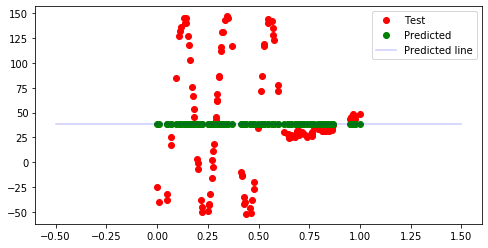

In [45]:
plt.figure(figsize = (8,4))
#plt.plot(X_train,Y_train,'bo',label = 'Train')
plt.plot(x_test,Y_test,'ro',label = 'Test')
plt.plot(x_test,model.predict(x_test),'go',label = 'Predicted')
plt.plot(np.linspace(-0.5,1.5,1000).reshape(-1,1),
         model.predict(np.linspace(-0.5,1.5,1000).reshape(-1,1)),
         'b',label = 'Predicted line',alpha = 0.2)
plt.legend()
plt.show()

In [0]:
# Standart scale data
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))
x_train = scaler.transform(X_train.reshape(-1, 1))
x_test = scaler.transform(X_test.reshape(-1, 1))

scaler = StandardScaler()
scaler.fit(Y_train.reshape(-1, 1))
y_train = scaler.transform(Y_train.reshape(-1, 1))
y_test = scaler.transform(Y_test.reshape(-1, 1))

# train model on Standartized data
model = create_model()
standart_loss = []
for i in tqdm(range(500)):
    model.fit(x_train,y_train,epochs=10,verbose = 0)    
    standart_loss.append(model.evaluate(x_test,y_test,verbose=0))

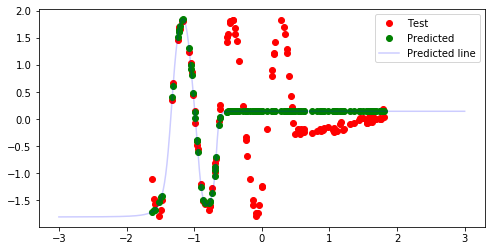

In [0]:
plt.figure(figsize = (8,4))
#plt.plot(X_train,Y_train,'bo',label = 'Train')
plt.plot(x_test,y_test,'ro',label = 'Test')
plt.plot(x_test,model.predict(x_test),'go',label = 'Predicted')
plt.plot(np.linspace(-3,3,1000).reshape(-1,1),
         model.predict(np.linspace(-3,3,1000).reshape(-1,1)),
         'b',label = 'Predicted line',alpha = 0.2)

plt.legend()
plt.show()

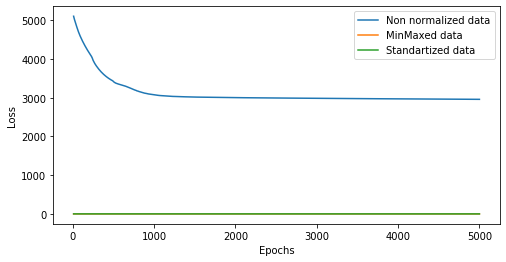

In [0]:
plt.figure(figsize = (8,4))
plt.plot(epochs,non_normalized_loss,label = 'Non normalized data')
plt.plot(epochs,minmax_loss,label = 'MinMaxed data')
plt.plot(epochs,standart_loss,label = 'Standartized data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

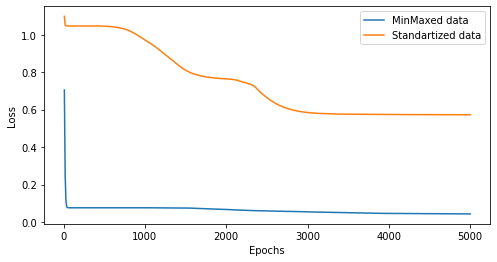

In [0]:
plt.figure(figsize = (8,4))
#plt.plot(epochs,non_normalized_loss,label = 'Non normalized data')
plt.plot(epochs,minmax_loss,label = 'MinMaxed data')
plt.plot(epochs,standart_loss,label = 'Standartized data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
# to free up memory
keras.backend.clear_session()
del model
gc.collect()

26416

**Q1:** Can we do this comparison?<br>
**Q2:** Why?<br>

Each scaler has some disadvanatages and advanatages. MinMax scaler will have cluters if the data has outliers, while standart scaler preserves the distances between points better. MinMax can work good on images as they are inherently bounded from 0 to 255. All available scalers in sklearn **MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer** and their comparison https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Another important thing is weight initialization in neural networks. So again question time.

**Q1**: What will happen if we initialize all weights 0?<br>
**Q2**: What will happend if we initialize all weights from uniform distribution [-1;1]

Keras by default uses glorot-uniform initialization:
$$U\text{ ~ }[-limit;limit]$$
$$limit = \sqrt{\frac{6}{\text{fan_in}+\text{fan_out}}}$$
$$\text{fan_in is the count of input neurons, while fan_out is the count of output neurons}$$

In [0]:
# other initializer
# NN architecture
def create_model_norm(hn = 6):
    input_layer = Input(shape = (1,), name = 'input_layer') # input layer
    h1 = Dense(hn,activation='sigmoid', name = 'hidden_layer1',
               kernel_initializer='random_uniform')(input_layer) # hidden layer 1
    h2 = Dense(hn,activation='sigmoid', name = 'hidden_layer2',
               kernel_initializer='random_uniform')(h1) # hidden layer 2
    h3 = Dense(hn,activation='sigmoid', name = 'hidden_layer3',
               kernel_initializer='random_uniform')(h2) # hidden layer 3
    output = Dense(1, name = 'output_layer',
                   kernel_initializer='random_uniform')(h3)

    model = Model(input_layer,output)
    model.compile(optimizer='adam',loss = 'mse')
    return model

In [0]:
# Standart scale data
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))
x_train = scaler.transform(X_train.reshape(-1, 1))
x_test = scaler.transform(X_test.reshape(-1, 1))

scaler = StandardScaler()
scaler.fit(Y_train.reshape(-1, 1))
y_train = scaler.transform(Y_train.reshape(-1, 1))
y_test = scaler.transform(Y_test.reshape(-1, 1))

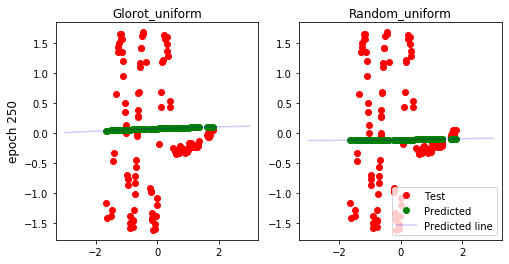

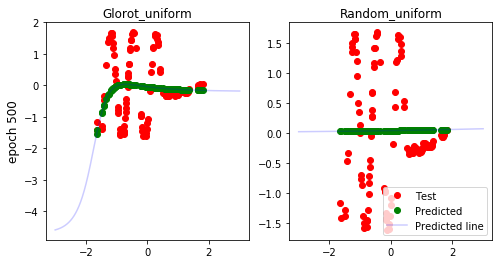

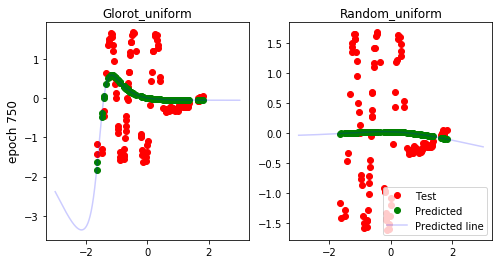

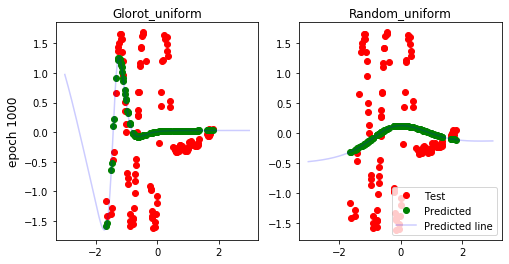

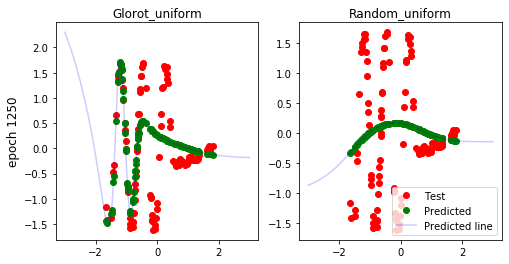

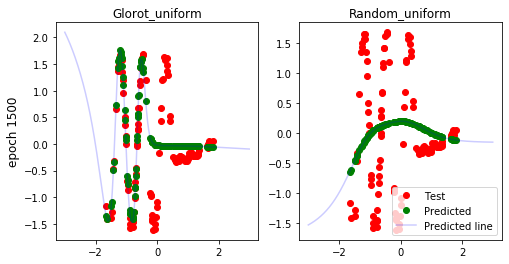

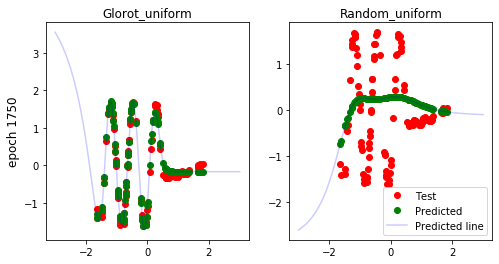

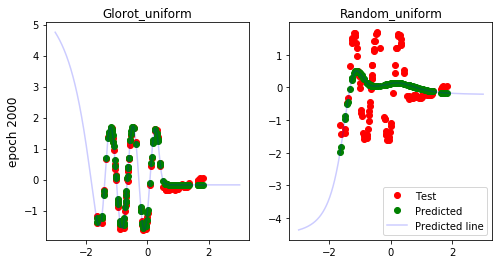

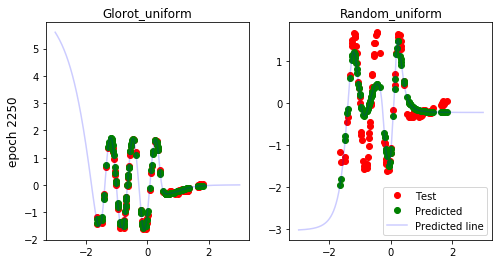

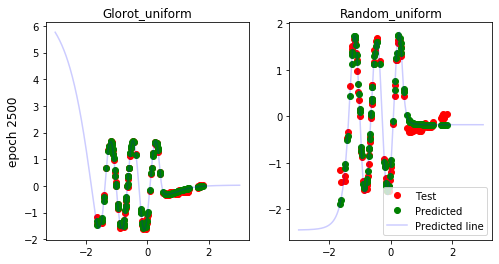

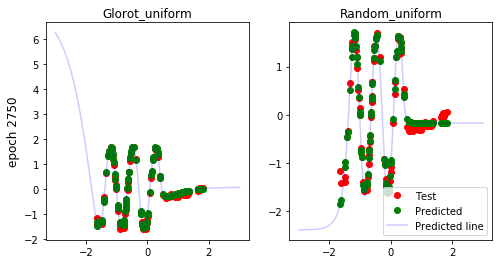

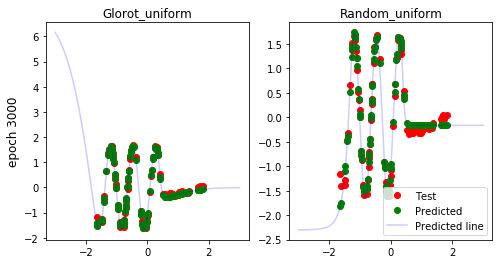

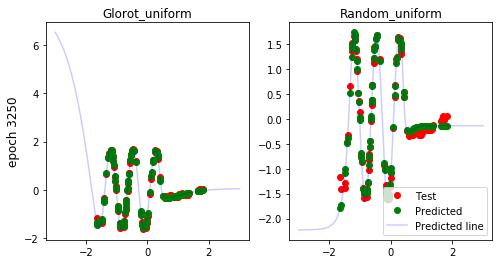

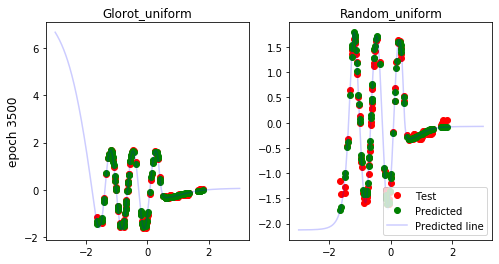

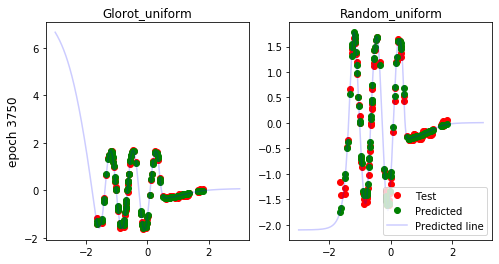

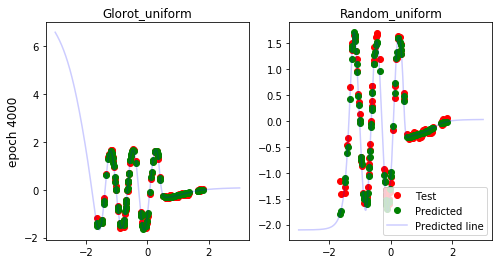

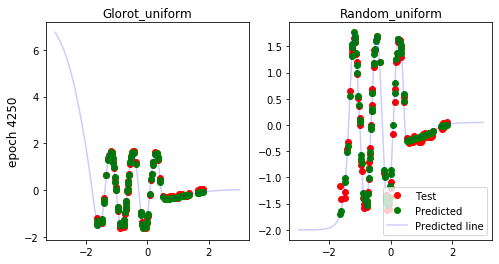

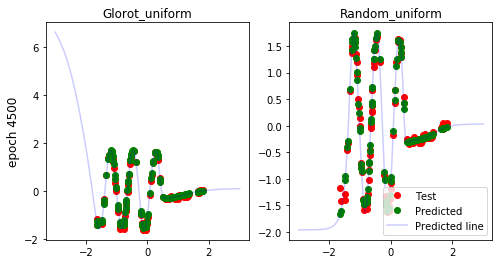

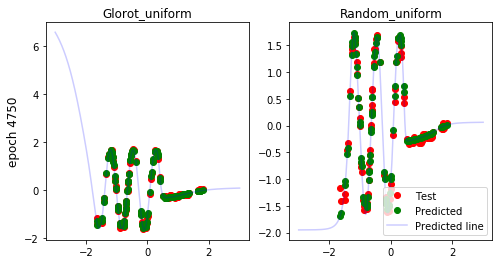

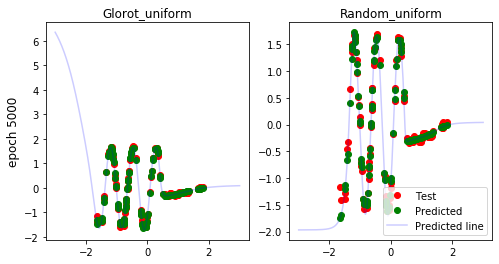

In [48]:
# train model on Standartized data
model = create_model(hn = 300)
model1 = create_model_norm(hn = 300)

for i in tqdm(range(20)):
    model.fit(x_train,y_train,epochs=100,verbose = 0)   
    model1.fit(x_train,y_train,epochs=100,verbose = 0)
    
    fig,axes = plt.subplots(1,2,figsize = (8,4))
    #plt.plot(X_train,Y_train,'bo',label = 'Train')
    axes[0].plot(x_test,y_test,'ro',label = 'Test')
    axes[0].plot(x_test,model.predict(x_test),'go',label = 'Predicted')
    axes[0].plot(np.linspace(-3,3,1000).reshape(-1,1),
             model.predict(np.linspace(-3,3,1000).reshape(-1,1)),
             'b',label = 'Predicted line',alpha = 0.2)
    axes[0].set_title('Glorot_uniform')

    axes[1].plot(x_test,y_test,'ro',label = 'Test')
    axes[1].plot(x_test,model1.predict(x_test),'go',label = 'Predicted')
    axes[1].plot(np.linspace(-3,3,1000).reshape(-1,1),
             model1.predict(np.linspace(-3,3,1000).reshape(-1,1)),
             'b',label = 'Predicted line',alpha = 0.2)
    axes[1].set_title('Random_uniform')
    axes[0].set_ylabel(f'epoch {250*(i+1)}',fontsize = 12)
    
    plt.legend(loc = 4)
    plt.show()

We will discuss 3 regularization techniques L1 & L2, Bacth Normalization and Dropout.

### L1 & L2 regularizations

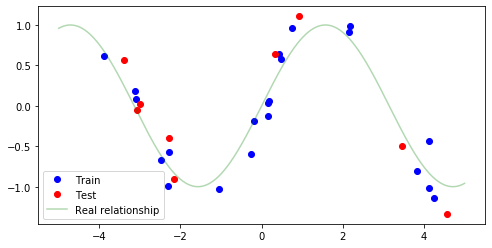

In [0]:
# Generate random data
X = 10*np.random.random(30)-5
Y = np.sin(X)+0.8*(np.random.random(30)-0.5)
# Plot data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)
plt.figure(figsize = (8,4))
plt.plot(X_train,Y_train,'bo',label = 'Train')
plt.plot(X_test,Y_test,'ro',label = 'Test')
plt.plot(np.linspace(-5,5,1000),np.sin(np.linspace(-5,5,1000)),'g',
         alpha = 0.3, label = 'Real relationship')
plt.legend()
plt.show()

In [0]:
# Standard scale data
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))
x_train = scaler.transform(X_train.reshape(-1, 1))
x_test = scaler.transform(X_test.reshape(-1, 1))
x_axis = scaler.transform(np.linspace(-5,5,1000).reshape(-1, 1))

scaler = StandardScaler()
scaler.fit(Y_train.reshape(-1, 1))
y_train = scaler.transform(Y_train.reshape(-1, 1))
y_test = scaler.transform(Y_test.reshape(-1, 1))
y_axis = scaler.transform(np.sin(np.linspace(-5,5,1000)).reshape(-1, 1))

In [0]:
input_layer = Input(shape = (1,), name = 'input_layer') # input layer
h1 = Dense(6,activation='sigmoid',
           name = 'hidden_layer1')(input_layer) # hidden layer 1
h2 = Dense(6,activation='sigmoid',
           name = 'hidden_layer2')(h1) # hidden layer 2
h3 = Dense(6,activation='sigmoid',
           name = 'hidden_layer3')(h2) # hidden layer 3
output = Dense(1, name = 'output_layer')(h3)

model = Model(input_layer,output)
model.compile(optimizer='adam',loss = 'mse')

In [0]:
# Network with l1 and l2 regularizations
input_layer = Input(shape = (1,), name = 'input_layer') # input layer
h1 = Dense(6,activation='sigmoid', name = 'hidden_layer1',
           kernel_regularizer = keras.regularizers.l1_l2(l1=0.0001, l2=0.0001))(input_layer) # hidden layer 1
h2 = Dense(6,activation='sigmoid', name = 'hidden_layer2',
           kernel_regularizer = keras.regularizers.l1_l2(l1=0.0001, l2=0.0001))(h1) # hidden layer 2
h3 = Dense(6,activation='sigmoid', name = 'hidden_layer3',
           kernel_regularizer = keras.regularizers.l1_l2(l1=0.0001, l2=0.0001))(h2) # hidden layer 3
output = Dense(1, name = 'output_layer',
           kernel_regularizer = keras.regularizers.l1_l2(l1=0.0001, l2=0.0001))(h3)

model_reg = Model(input_layer,output)
model_reg.compile(optimizer='adam',loss = 'mse')

In [0]:
for i in tqdm(range(3000)):
    model.fit(x_train,y_train,epochs=10,verbose = 0)
    model_reg.fit(x_train,y_train,epochs=10,verbose = 0) 

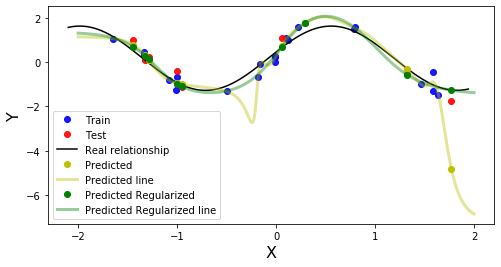

In [0]:
plt.figure(figsize = (8,4))
plt.plot(x_train,y_train,'bo',label = 'Train', alpha = 0.9)
plt.plot(x_test,y_test,'ro',label = 'Test',alpha = 0.9)
plt.plot(x_axis,y_axis,'black',alpha = 1, label = 'Real relationship')

plt.plot(x_test,model.predict(x_test),'yo',label = 'Predicted')
plt.plot(np.linspace(-2,2,1000).reshape(-1,1),
         model.predict(np.linspace(-2,2,1000).reshape(-1,1)),
         'y',label = 'Predicted line',alpha = 0.4, lw = 3)

plt.plot(x_test,model_reg.predict(x_test),'go',label = 'Predicted Regularized')
plt.plot(np.linspace(-2,2,1000).reshape(-1,1),
         model_reg.predict(np.linspace(-2,2,1000).reshape(-1,1)),
         'g',label = 'Predicted Regularized line',alpha = 0.4, lw = 3)
plt.ylabel('Y',fontsize = 16)
plt.xlabel('X',fontsize = 16)
plt.legend()
plt.show()

### Dropout

Dropout randomly deactivates some given portion of neurons in a layer. This results in forcing neural network to not rely on specific neurons.

![title](https://miro.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [0]:
input_layer = Input(shape = (1,), name = 'input_layer') # input layer
h1 = Dense(6,activation='sigmoid', name = 'hidden_layer1')(input_layer) # hidden layer 1
h1d = Dropout(0.1)(h1)
h2 = Dense(6,activation='sigmoid', name = 'hidden_layer2')(h1d) # hidden layer 2
h2d = Dropout(0.1)(h2)
h3 = Dense(6,activation='sigmoid', name = 'hidden_layer3')(h2d) # hidden layer 3
h3d = Dropout(0.1)(h3)
output = Dense(1, name = 'output_layer')(h3d)

model_drop = Model(input_layer,output)
model_drop.compile(optimizer='adam',loss = 'mse')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
for i in tqdm(range(3000)):
    model_drop.fit(x_train,y_train,epochs=10,verbose = 0)

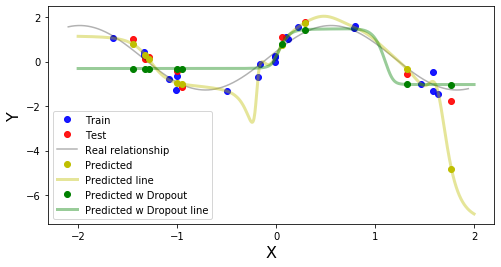

In [0]:
plt.figure(figsize = (8,4))
plt.plot(x_train,y_train,'bo',label = 'Train', alpha = 0.9)
plt.plot(x_test,y_test,'ro',label = 'Test',alpha = 0.9)
plt.plot(x_axis,y_axis,'black',alpha = 0.3, label = 'Real relationship')

plt.plot(x_test,model.predict(x_test),'yo',label = 'Predicted')
plt.plot(np.linspace(-2,2,1000).reshape(-1,1),
         model.predict(np.linspace(-2,2,1000).reshape(-1,1)),
         'y',label = 'Predicted line',alpha = 0.4, lw = 3)

plt.plot(x_test,model_drop.predict(x_test),'go',label = 'Predicted w Dropout')
plt.plot(np.linspace(-2,2,1000).reshape(-1,1),
         model_drop.predict(np.linspace(-2,2,1000).reshape(-1,1)),
         'g',label = 'Predicted w Dropout line',alpha = 0.4, lw = 3)

plt.ylabel('Y',fontsize = 16)
plt.xlabel('X',fontsize = 16)
plt.legend()
plt.show()

Dropout has some nuances. Say we trained NN with 50% dropout. At testing time our value would be overestimated as we use all neurons to predict. So we must multipliy the ouptputs with 0.5 to have them in the same range as in the training phase. Keras implements **inverted dropout** which does this trick in the training phase by multiplying the outputs of neurons by 1/0.5. Thus we don't have to adjust the NN during testing phase anyhow.

### Batch Normalization

wiki article on BatchNorm: https://en.wikipedia.org/wiki/Batch_normalization<br>
How Bacth Norm backprop works: https://kevinzakka.github.io/2016/09/14/batch_normalization/

Batch Normalization normalizes input to a neuron/layer taking account batch statistics. This helps the network to converge faster and helps to reach overall better performance as normalization takes care of slight distributional shifts in the dataset. Indirectly it also reduces overfitting.

![title](https://kratzert.github.io/images/bn_backpass/bn_algorithm.PNG)


the $\epsilon$ is added for numerical stability

During testing phase we use the population statistics as mean and variance and of course use already leart scale and shift.

In [0]:
input_layer = Input(shape = (1,), name = 'input_layer') # input layer
b1 = BatchNormalization()(input_layer)
h1 = Dense(6,activation='sigmoid',
           name = 'hidden_layer1')(input_layer) # hidden layer 1
b2 = BatchNormalization()(h1)
h2 = Dense(6,activation='sigmoid',
           name = 'hidden_layer2')(h1) # hidden layer 2
b3 = BatchNormalization()(h2)
h3 = Dense(6,activation='sigmoid',
           name = 'hidden_layer3')(h2) # hidden layer 3
b4 = BatchNormalization()(h3)
output = Dense(1, name = 'output_layer')(b4)

model_batch = Model(input_layer,output)
model_batch.compile(optimizer='adam',loss = 'mse')

In [0]:
for i in tqdm(range(3000)):
    model_batch.fit(x_train,y_train,epochs=10,verbose = 0)

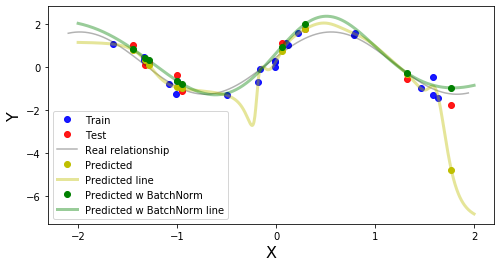

In [0]:
plt.figure(figsize = (8,4))
plt.plot(x_train,y_train,'bo',label = 'Train', alpha = 0.9)
plt.plot(x_test,y_test,'ro',label = 'Test',alpha = 0.9)
plt.plot(x_axis,y_axis,'black',alpha = 0.3, label = 'Real relationship')

plt.plot(x_test,model.predict(x_test),'yo',label = 'Predicted')
plt.plot(np.linspace(-2,2,1000).reshape(-1,1),
         model.predict(np.linspace(-2,2,1000).reshape(-1,1)),
         'y',label = 'Predicted line',alpha = 0.4, lw = 3)

plt.plot(x_test,model_batch.predict(x_test),'go',label = 'Predicted w BatchNorm')
plt.plot(np.linspace(-2,2,1000).reshape(-1,1),
         model_batch.predict(np.linspace(-2,2,1000).reshape(-1,1)),
         'g',label = 'Predicted w BatchNorm line',alpha = 0.4, lw = 3)

plt.ylabel('Y',fontsize = 16)
plt.xlabel('X',fontsize = 16)
plt.legend()
plt.show()